In [1]:
#loading Libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import math as math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.decomposition import FastICA

In [2]:
#Reading CSV File
data = pd.read_excel('Mini_protein_data_Ha_for_ml_3_4.xlsx');

In [3]:
data

Category  Category_0_1  Category_3_4  Mono_total_score  Mono_AlaCount  \
0            4             1             1             -2.96           0.15   
1            4             1             1             -3.23           0.17   
2            3             1             0             -3.21           0.15   
3            3             1             0             -3.04           0.10   
4            3             1             0             -3.20           0.12   
...        ...           ...           ...               ...            ...   
1772         3             1             0             -2.53           0.11   
1773         3             1             0             -3.30           0.15   
1774         3             1             0             -2.55           0.11   
1775         3             1             0             -2.97           0.12   
1776         3             1             0             -2.93           0.12   

      Mono_bb  Mono_buried_minus_exposed  Mono_buried_np  \
0       -0.01                      72.47          117.39   
1       -0.01                      72.85          117.21   
2       -0.01                      77.07          118.47   
3       -0.01                      73.75          116.45   
4       -0.01                      75.07          117.40   
...       ...                        ...             ...   
1772    -0.01                      76.13          118.38   
1773    -0.01                      69.11          112.85   
1774    -0.01                      76.22          118.39   
1775    -0.01                      72.87          116.28   
1776    -0.01                      64.65          109.40   

      Mono_buried_over_exposed  Mono_cavity_volume  ...  Core_res_w  \
0                         0.07                0.38  ...           1   
1                         0.07                0.19  ...           1   
2                         0.07                0.17  ...           0   
3                         0.07                0.17  ...           1   
4                         0.07                0.00  ...           1   
...                        ...                 ...  ...         ...   
1772                      0.08                0.14  ...           1   
1773                      0.06                0.11  ...           0   
1774                      0.08                0.19  ...           1   
1775                      0.07                0.09  ...           0   
1776                      0.06                0.00  ...           1   

      Core_res_I  Core_total  Positive_charge_H  Positive_charge_K  \
0              3          11                  2                  4   
1              2           8                  1                  4   
2              3           9                  1                  5   
3              5          14                  1                  1   
4              5          14                  1                  1   
...          ...         ...                ...                ...   
1772           2           8                  1                  2   
1773           3          10                  1                  2   
1774           2           9                  1                  2   
1775           3          10                  2                  2   
1776           3           9                  0                  1   

      Positive_charge_R  Positive_total  Negative_charge_D  Negative_charge_E  \
0                     2               8                  0                  5   
1                     1               6                  0                  4   
2                     0               6                  1                  4   
3                     2               4                  3                  3   
4                     2               4                  3                  3   
...                 ...             ...                ...                ...   
1772                  4               7                  2                 

In [22]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction; LocallyLinearEmbedding dimention reduction
X = data.drop(['Category','Category_0_1','Category_3_4'], axis = 1)
Y = data['Category_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y) #training dataset
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X = sfm.transform(X)
ica = FastICA(n_components=14,max_iter=600)
X_ica = ica.fit_transform(X)

In [23]:
#Data Spliting into Training and Testing
x_train_raw, x_test_raw, y_train_raw, y_test_raw =train_test_split(X_ica,Y, random_state =0)

In [24]:
#Hyperparameter Tuning Parameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [25]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(80,80),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(80,80),text_fontsize=100,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat, average='macro')

In [26]:
# First create the base model to tune
rf = RandomForestClassifier(class_weight='balanced')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_raw, y_train_raw)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [27]:
#Best_parameters_found
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [5,10,15],
    'max_features': ['auto'],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [4,5,6],
    'n_estimators': [1600,1800,2000]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [29]:
grid_search.fit(x_train_raw, y_train_raw)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  8.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1600, 1800, 2000]},
             verbose=2)

In [30]:
grid_search.get_params(deep=True)

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(class_weight='balanced'),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'bootstrap': [False],
  'max_depth': [5, 10, 15],
  'max_features': ['auto'],
  'min_samples_leaf': [3, 4, 5],
  'min_samples_split': [4, 5, 6],
  'n_estimators': [1600, 1800, 2000]},
 'pre_dispatch'

In [31]:
y_GridCV_RandomForest = grid_search.predict(x_test_raw)
print("Random forest accuracy Best Kernel score :" , accuracy_score(y_test_raw, y_GridCV_RandomForest))

Random forest accuracy Best Kernel score : 0.597752808988764


Confusion matrix, without normalization
[[113 133]
 [ 46 153]]
Normalized confusion matrix
[[0.45934959 0.54065041]
 [0.23115578 0.76884422]]


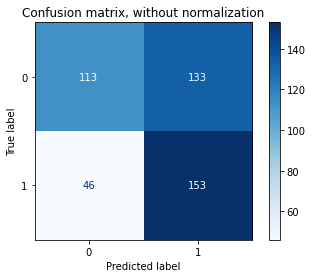

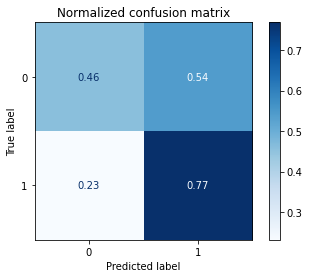

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       246
           1       0.53      0.77      0.63       199

    accuracy                           0.60       445
   macro avg       0.62      0.61      0.59       445
weighted avg       0.63      0.60      0.59       445



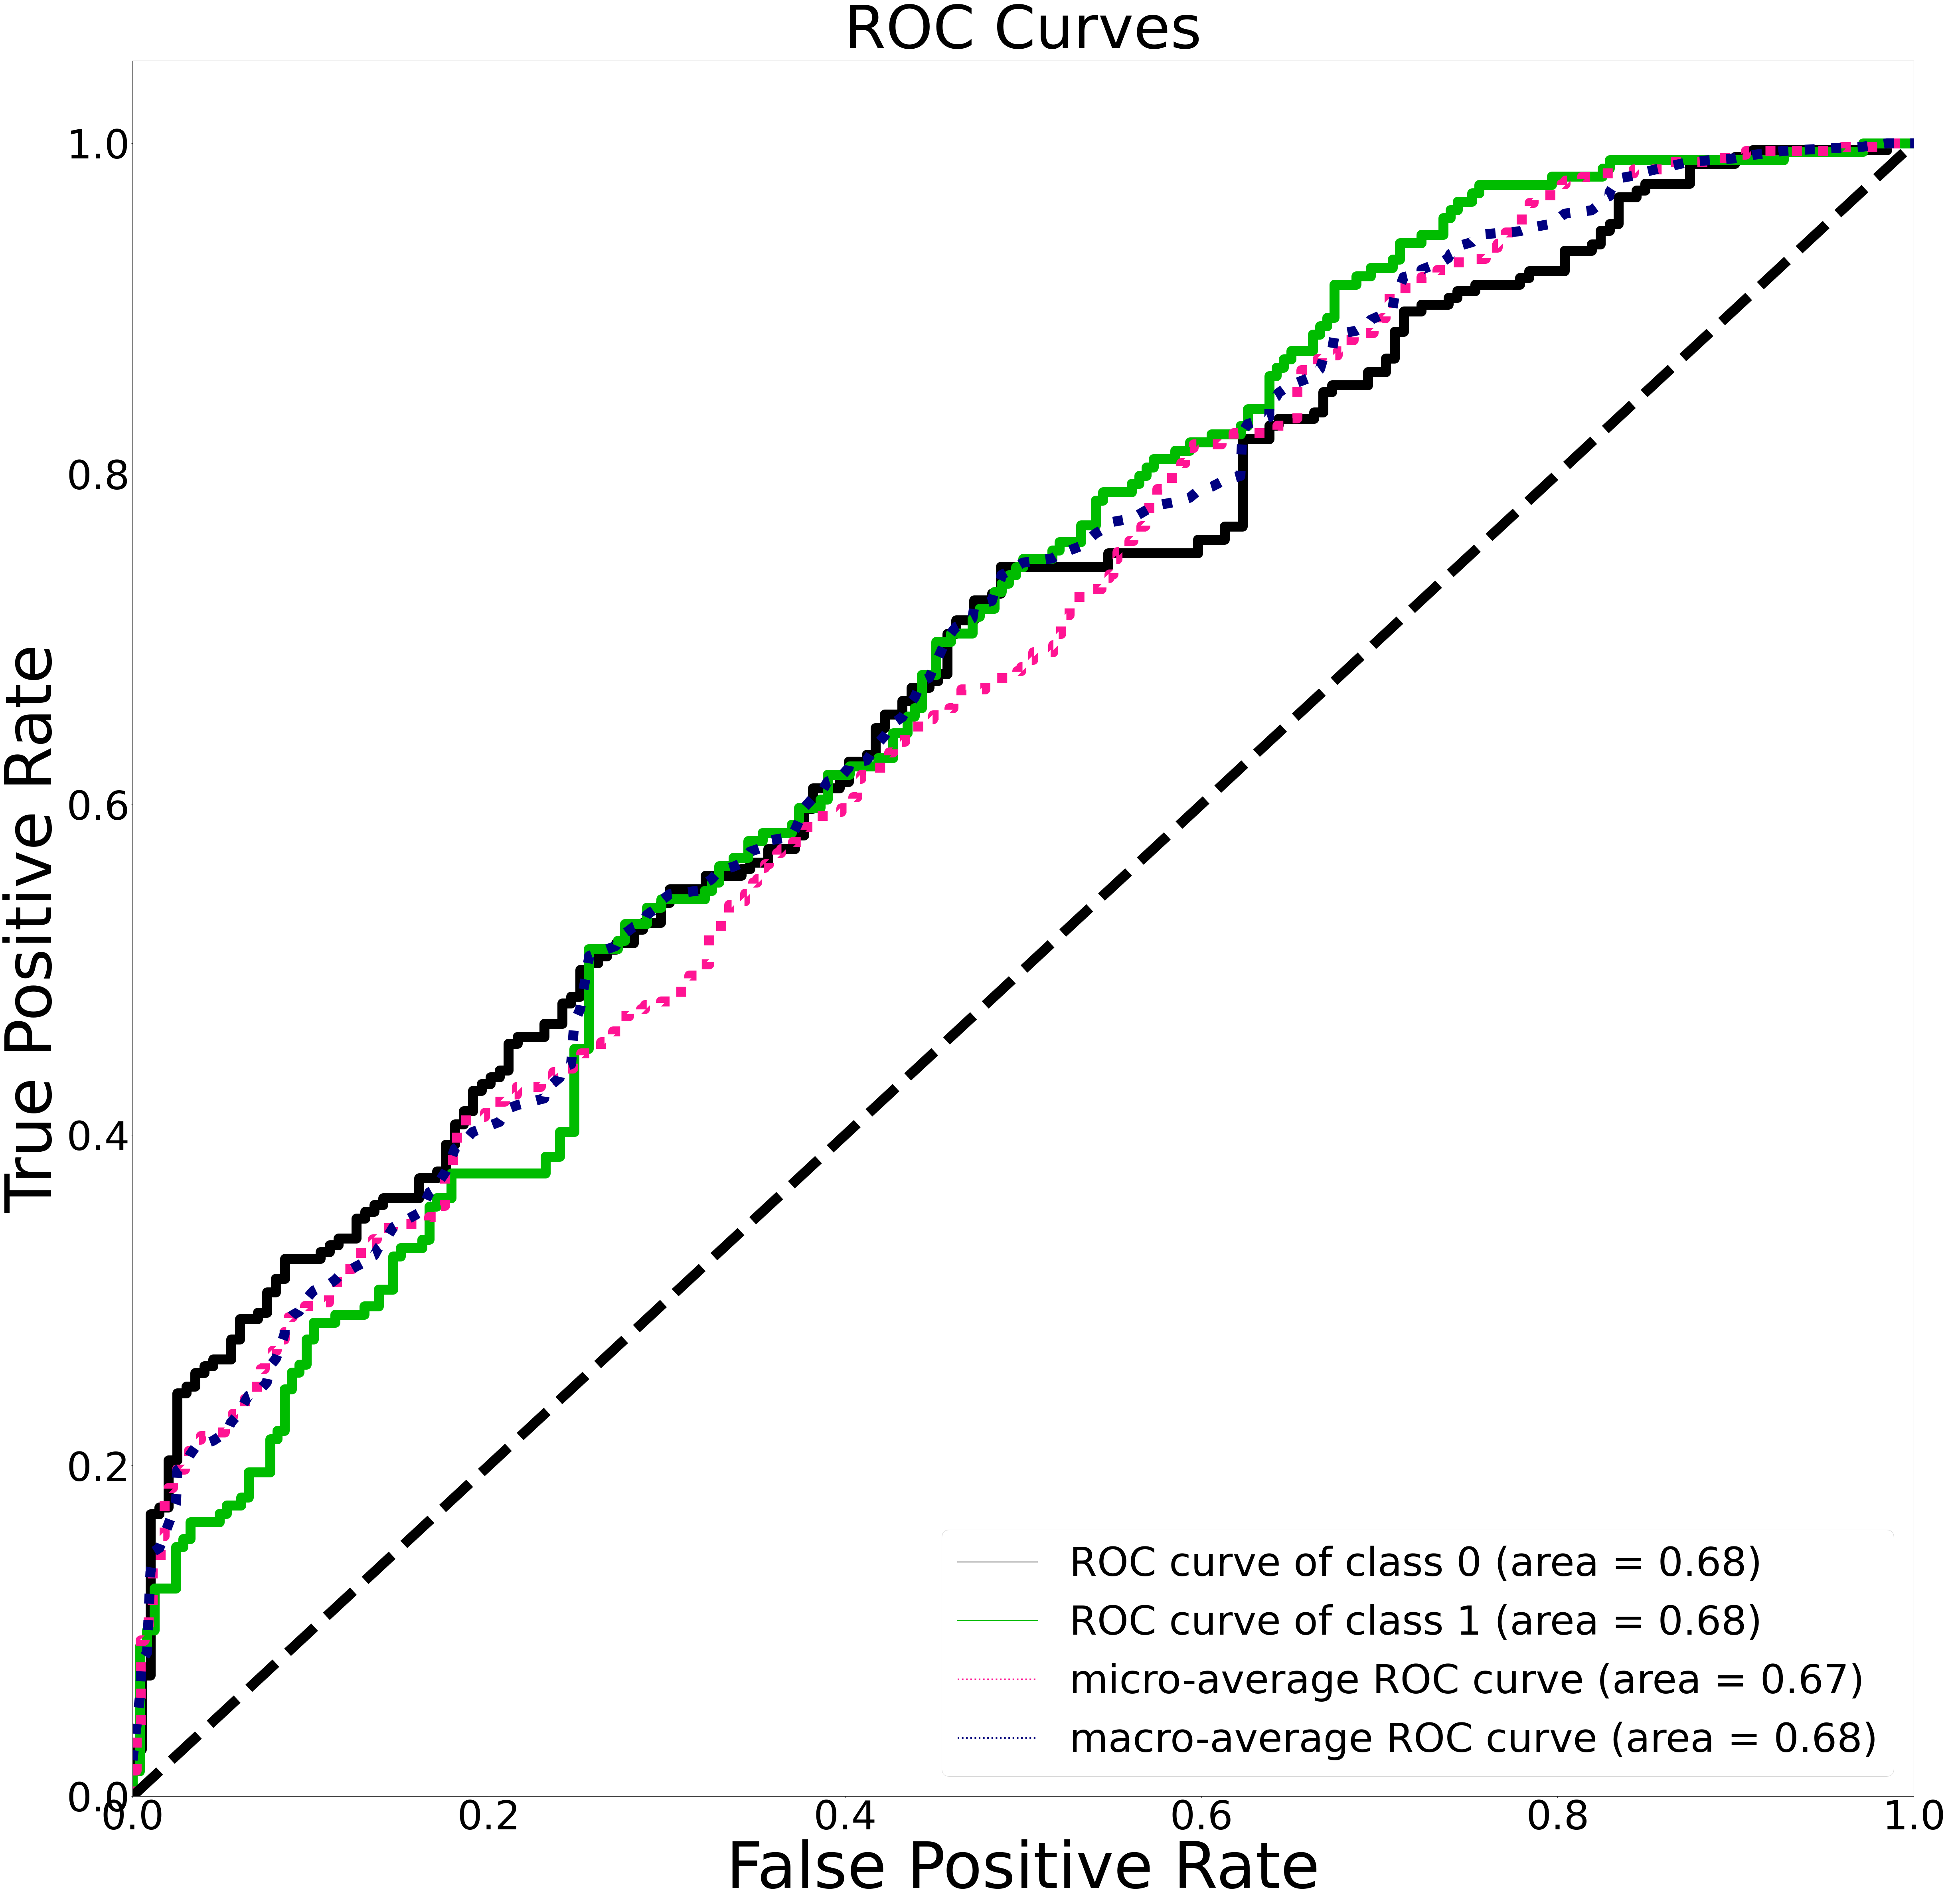

Average precision-recall score Random forest: 0.51


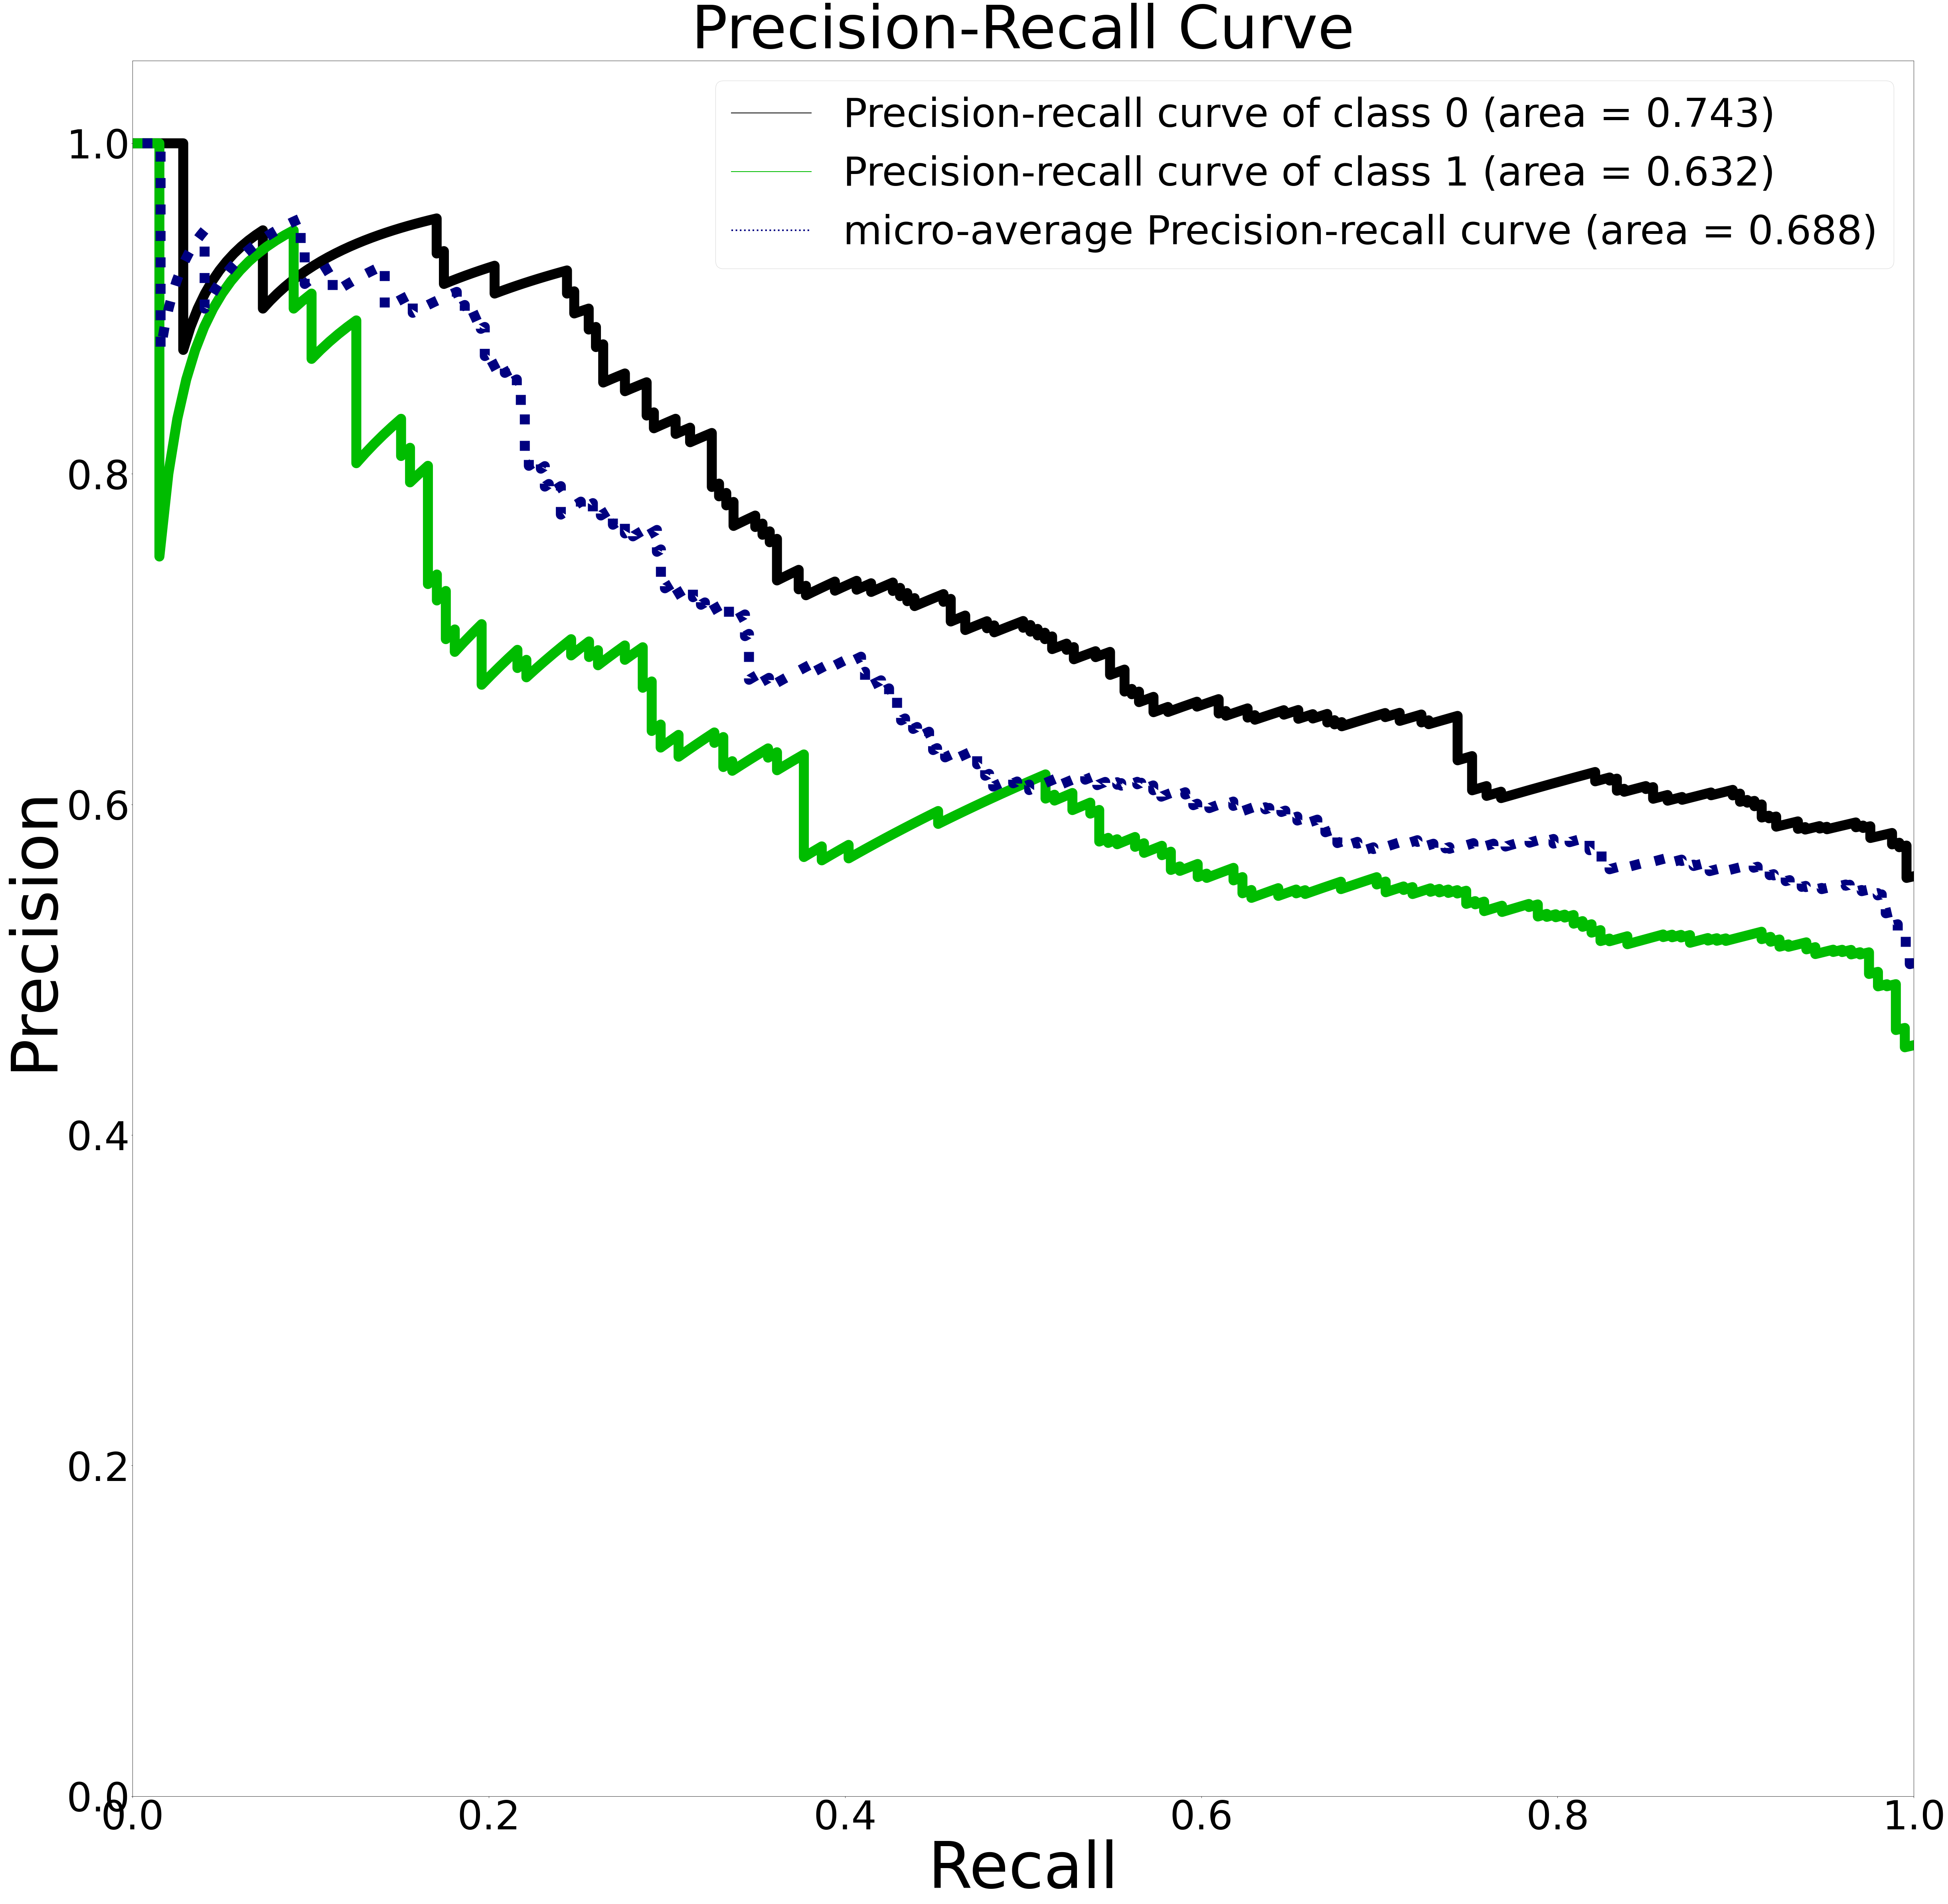

In [32]:
#Evaluation Basal Random Forest
plot_graphs(grid_search,x_test_raw,y_test_raw,y_GridCV_RandomForest)

In [33]:
#Model trained with Best Parameteres
best_random = grid_search

In [34]:
#Using refined Classifier for prediction
y_best_predict = best_random.predict(x_test_raw)

In [35]:
#Trainig a Basal Random Forest for Comparing
randomfor = RandomForestClassifier()
randomfor.fit(x_train_raw, y_train_raw)
y_basal_RandomForest = randomfor.predict(x_test_raw)
print("Random forest accuracy Best Kernel score :" , accuracy_score(y_test_raw, y_basal_RandomForest))

Random forest accuracy Best Kernel score : 0.6202247191011236


<ipython-input-36-10c3d1acc711>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


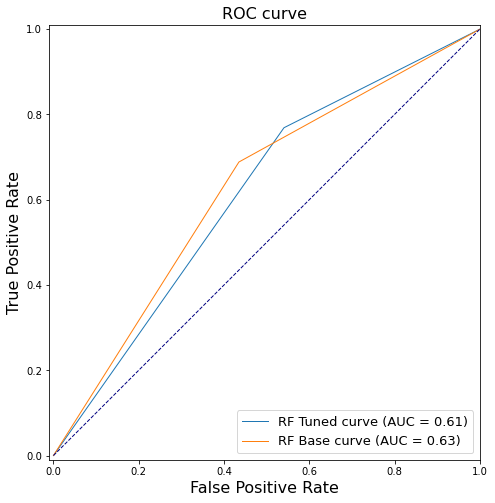

In [36]:
#### Plotting ROC Graphs to compare
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_raw, y_best_predict)
fpr_rf2, tpr_rf2, _ = roc_curve(y_test_raw, y_basal_RandomForest)

roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} Tuned curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
plt.plot(fpr_rf2, tpr_rf2, lw=1, label='{} Base curve (AUC = {:0.2f})'.format('RF',roc_auc_rf2))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Confusion matrix, without normalization
[[139 107]
 [ 62 137]]
Normalized confusion matrix
[[0.56504065 0.43495935]
 [0.31155779 0.68844221]]


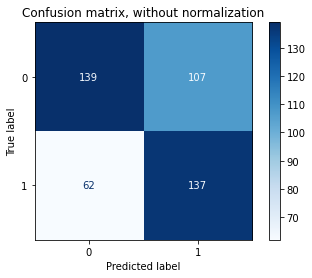

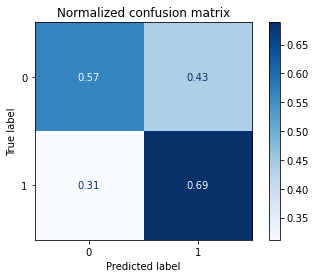

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       246
           1       0.53      0.77      0.63       199

    accuracy                           0.60       445
   macro avg       0.62      0.61      0.59       445
weighted avg       0.63      0.60      0.59       445



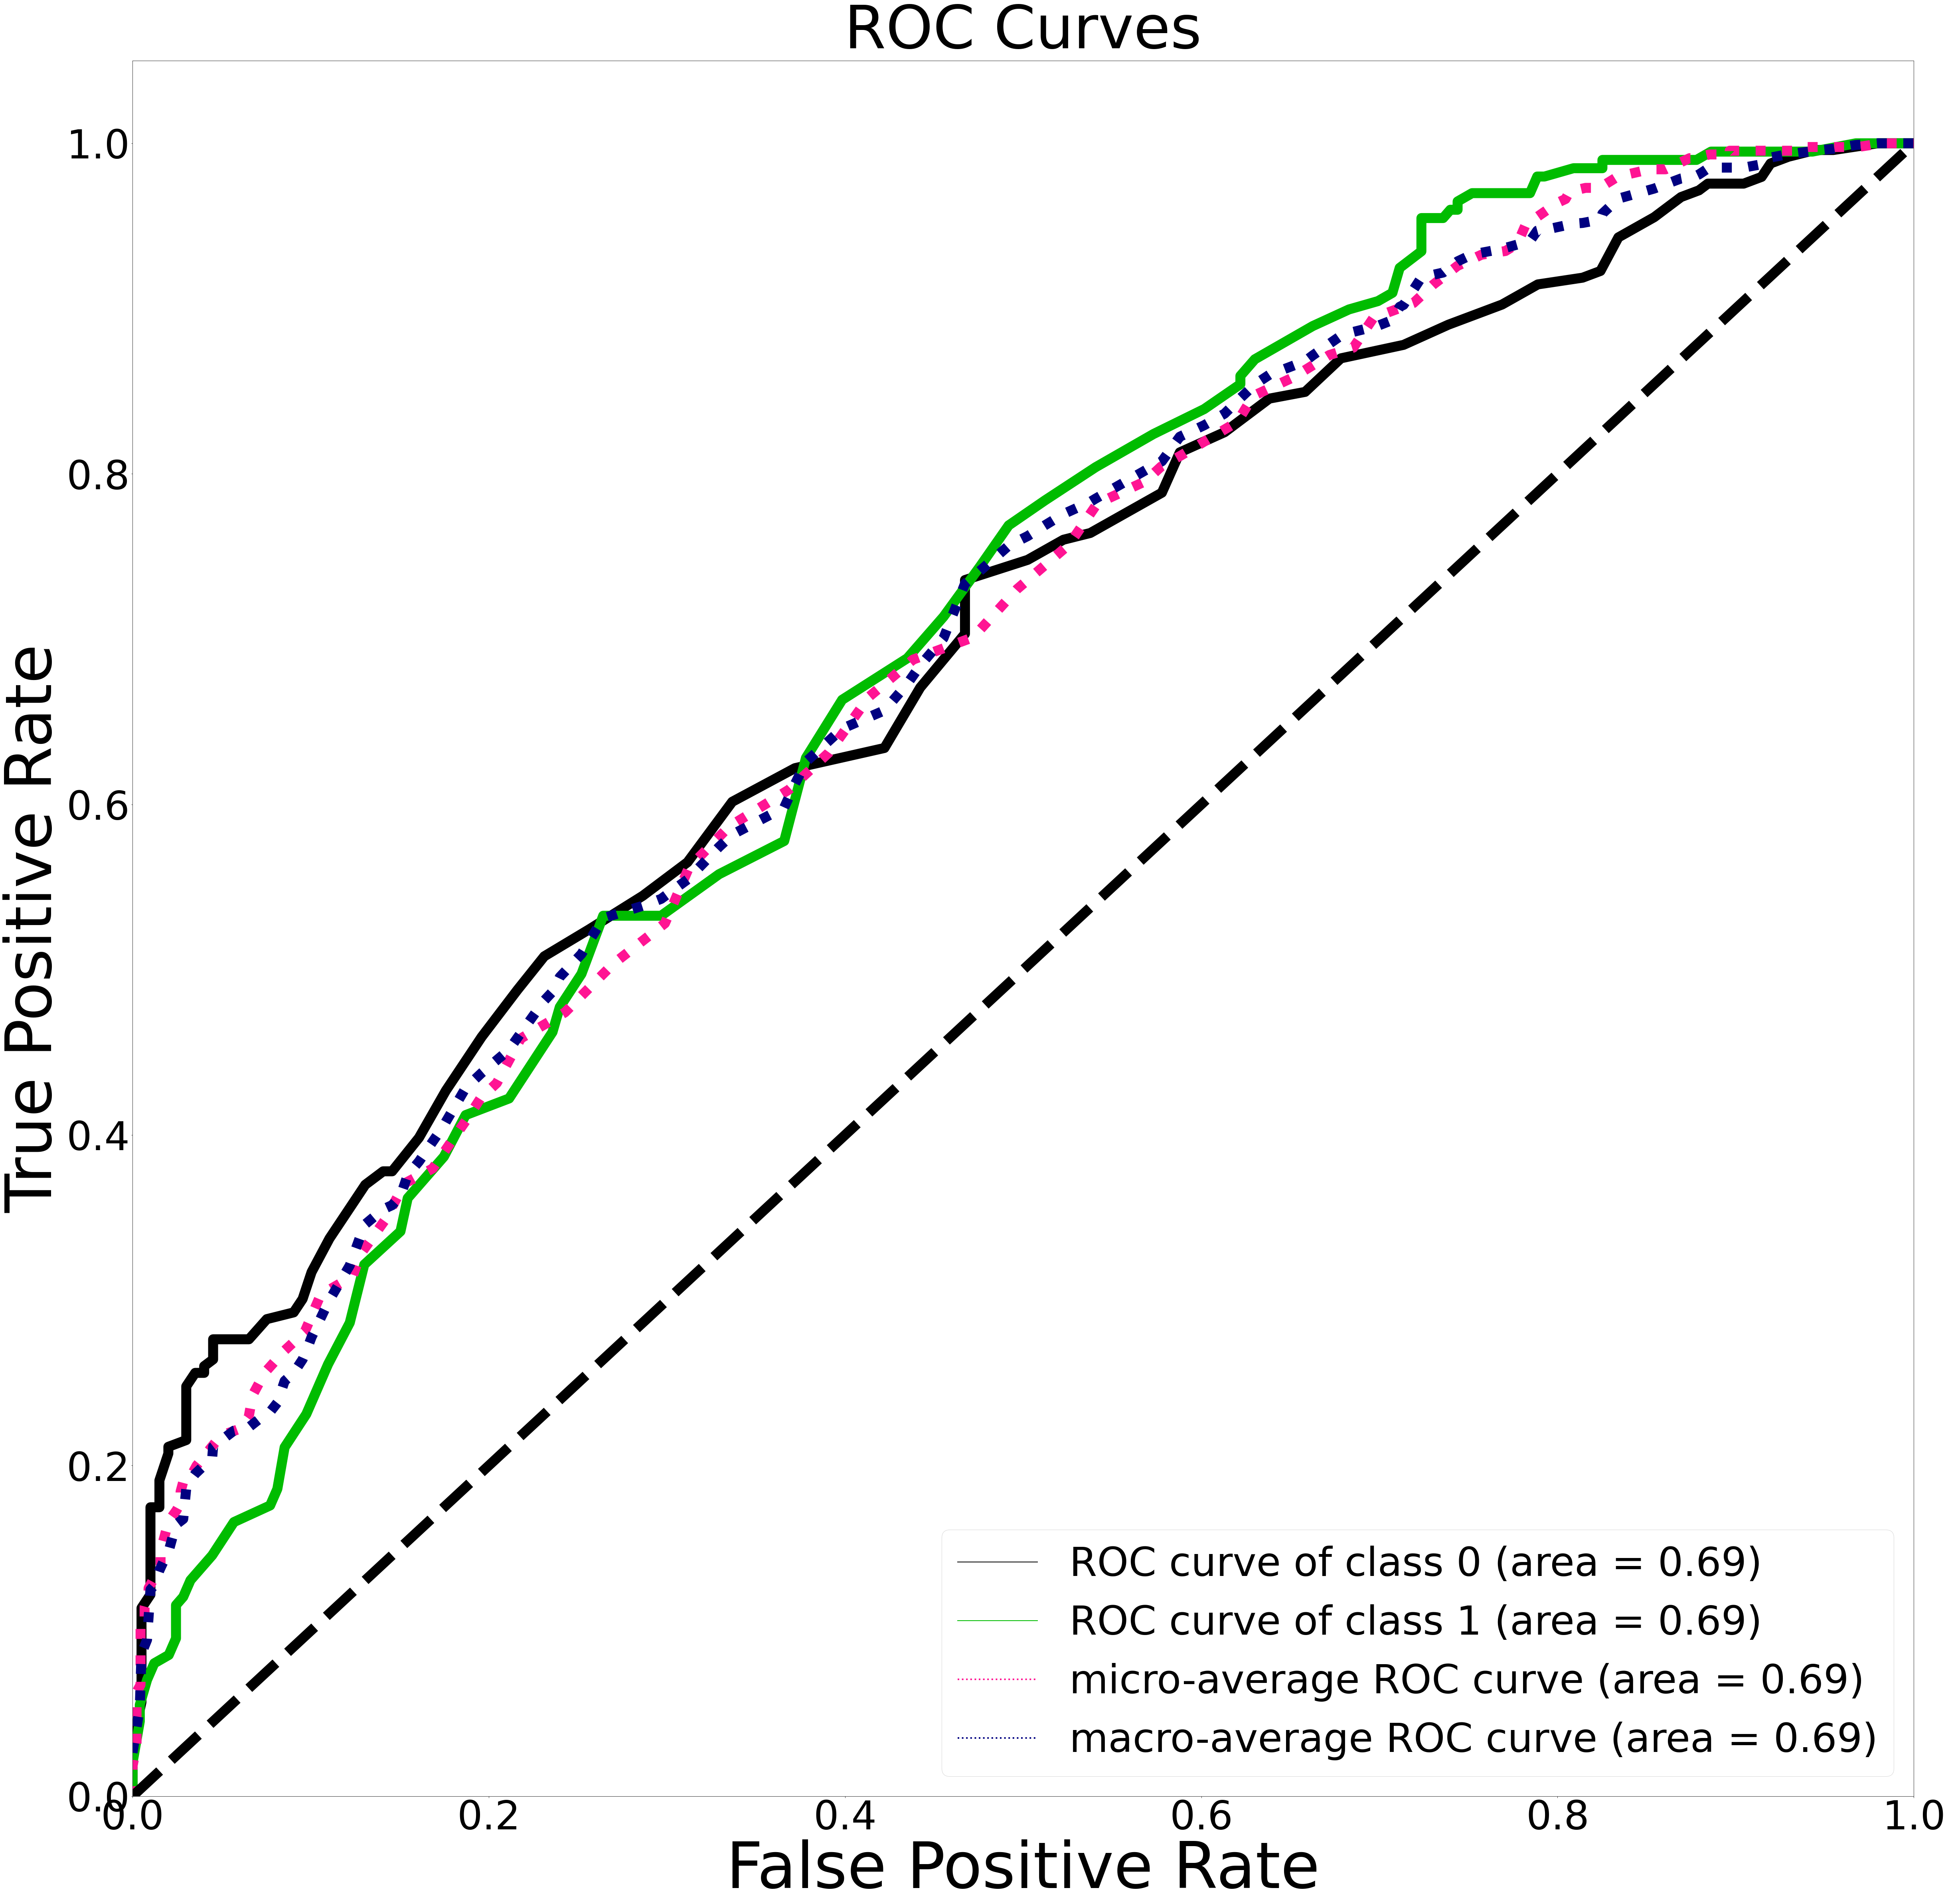

Average precision-recall score Random forest: 0.51


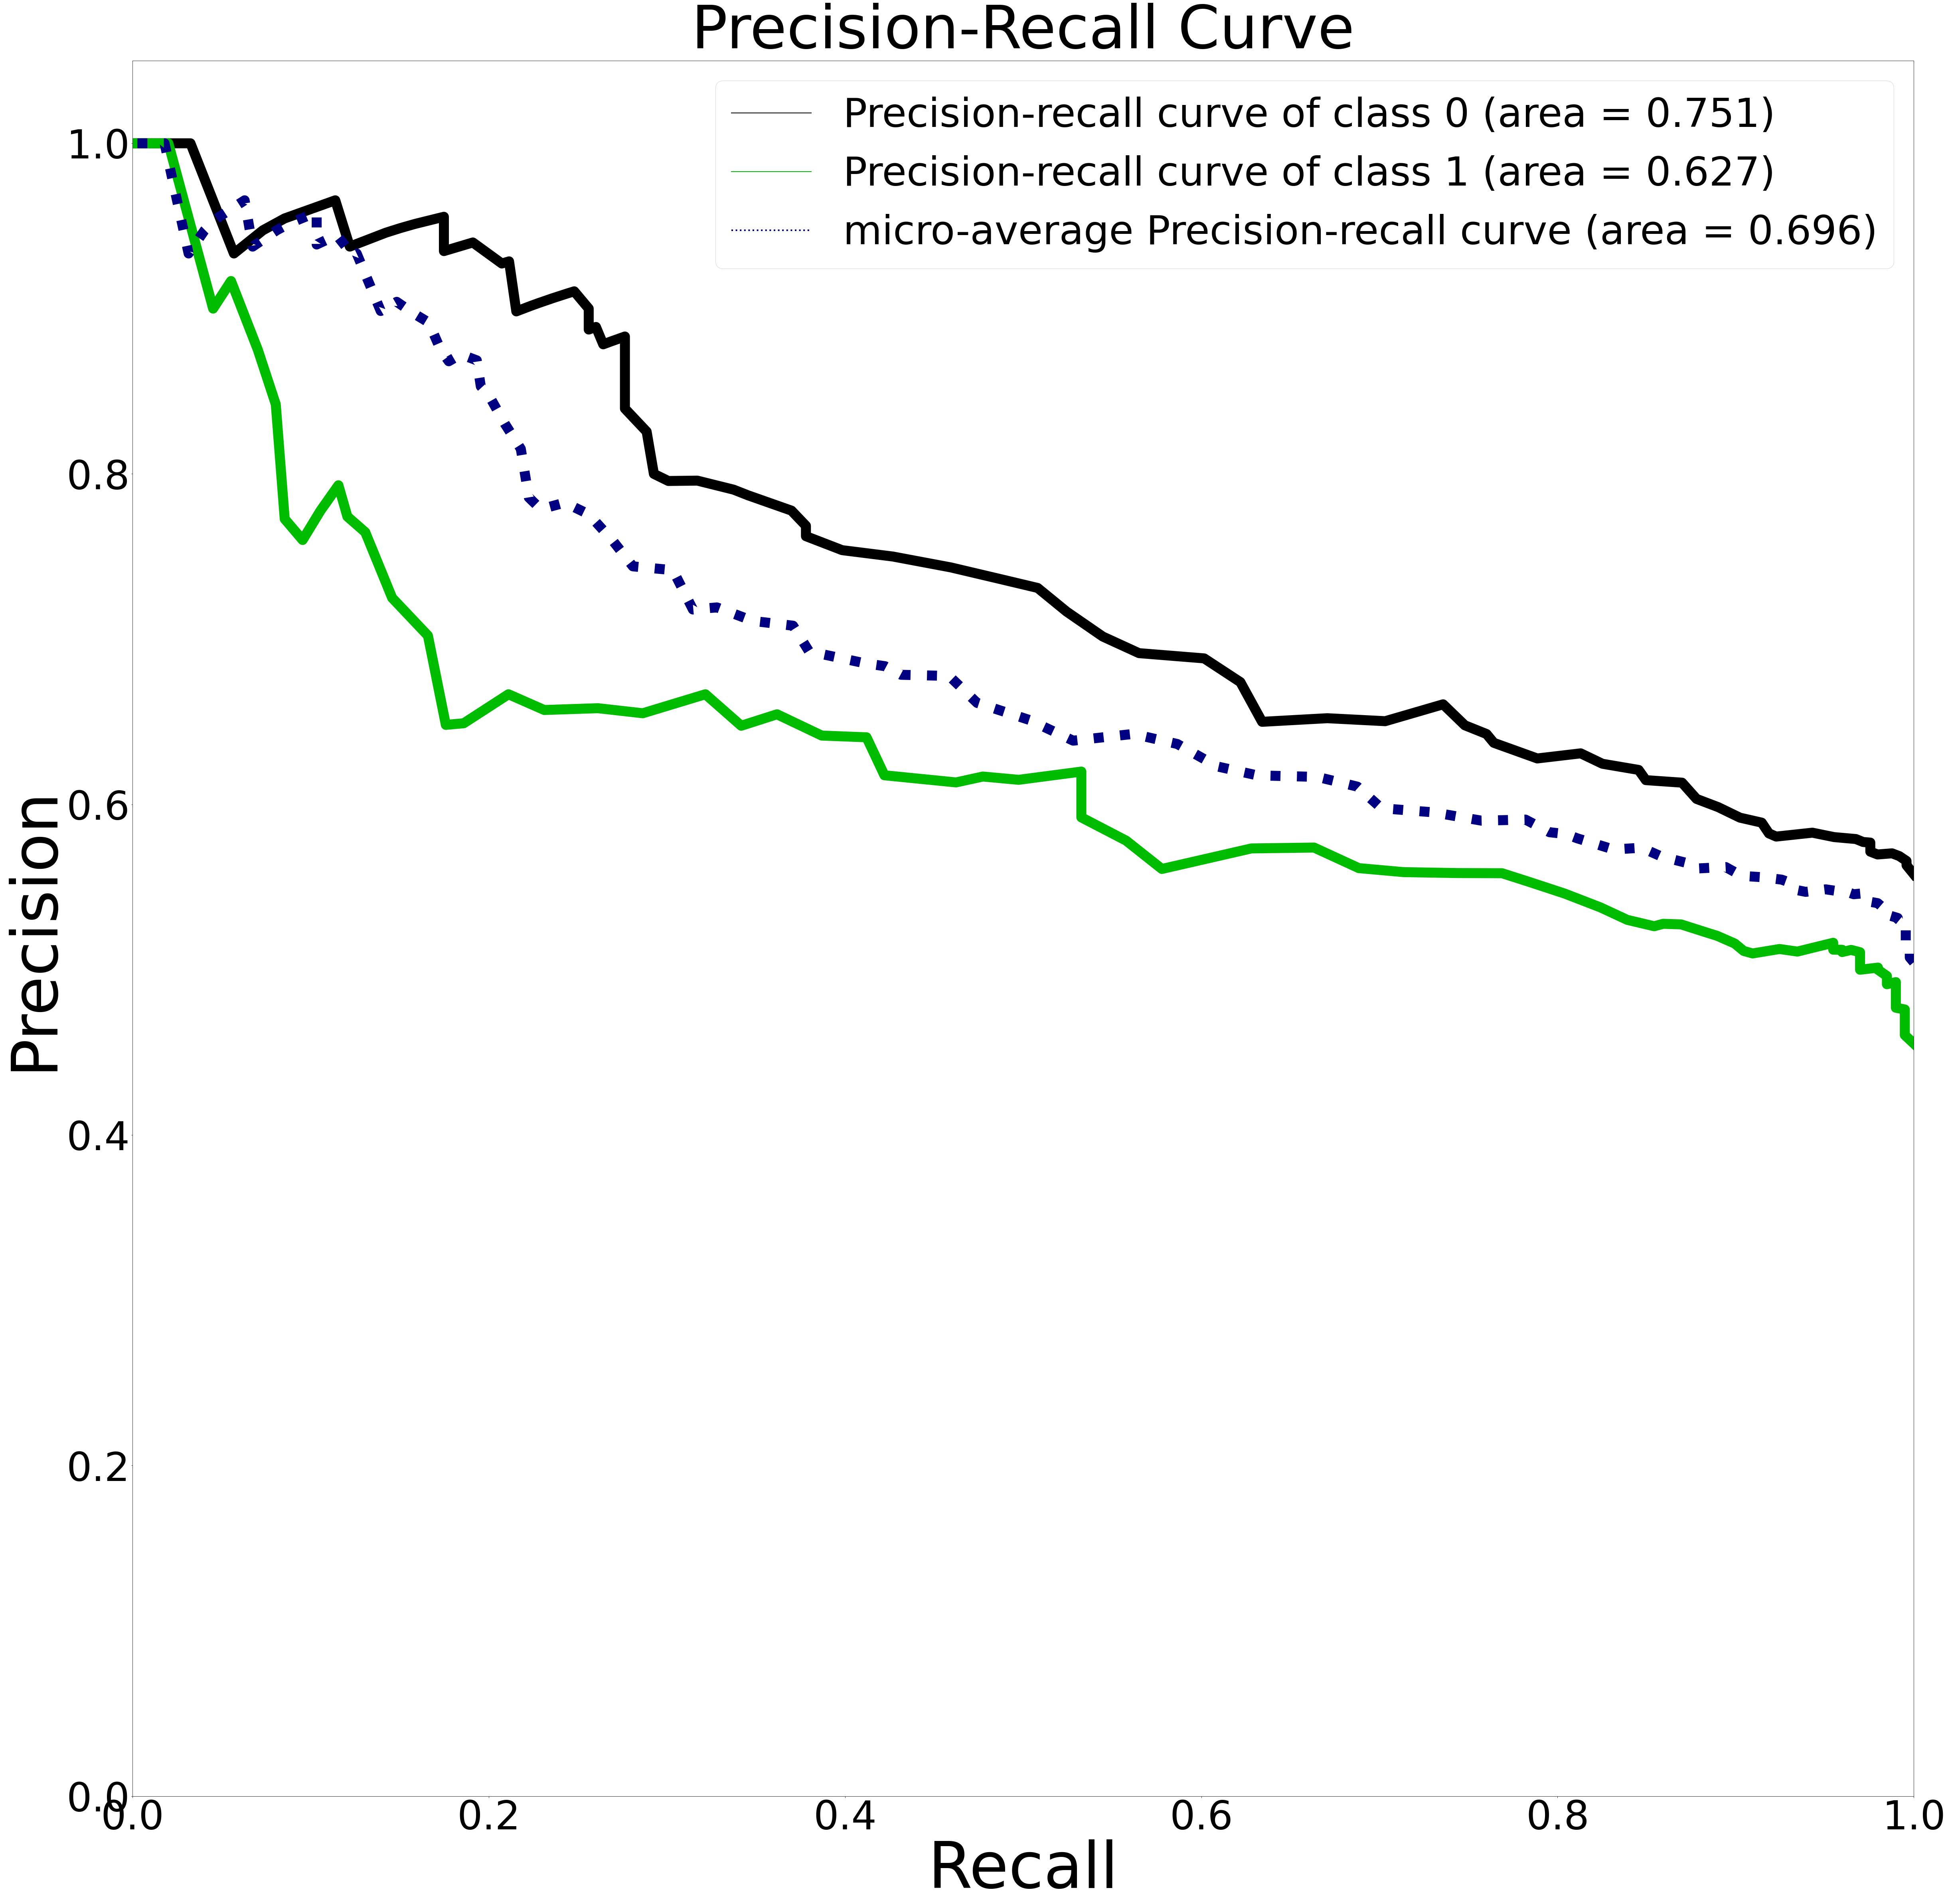

In [37]:
#Evaluation Basal Random Forest
plot_graphs(randomfor,x_test_raw,y_test_raw,y_best_predict)

Confusion matrix, without normalization
[[113 133]
 [ 46 153]]
Normalized confusion matrix
[[0.45934959 0.54065041]
 [0.23115578 0.76884422]]


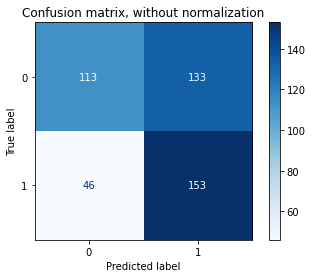

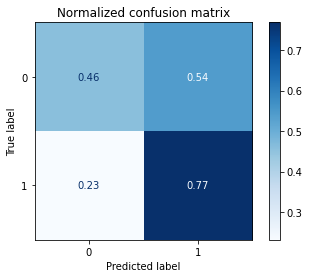

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       246
           1       0.56      0.69      0.62       199

    accuracy                           0.62       445
   macro avg       0.63      0.63      0.62       445
weighted avg       0.63      0.62      0.62       445



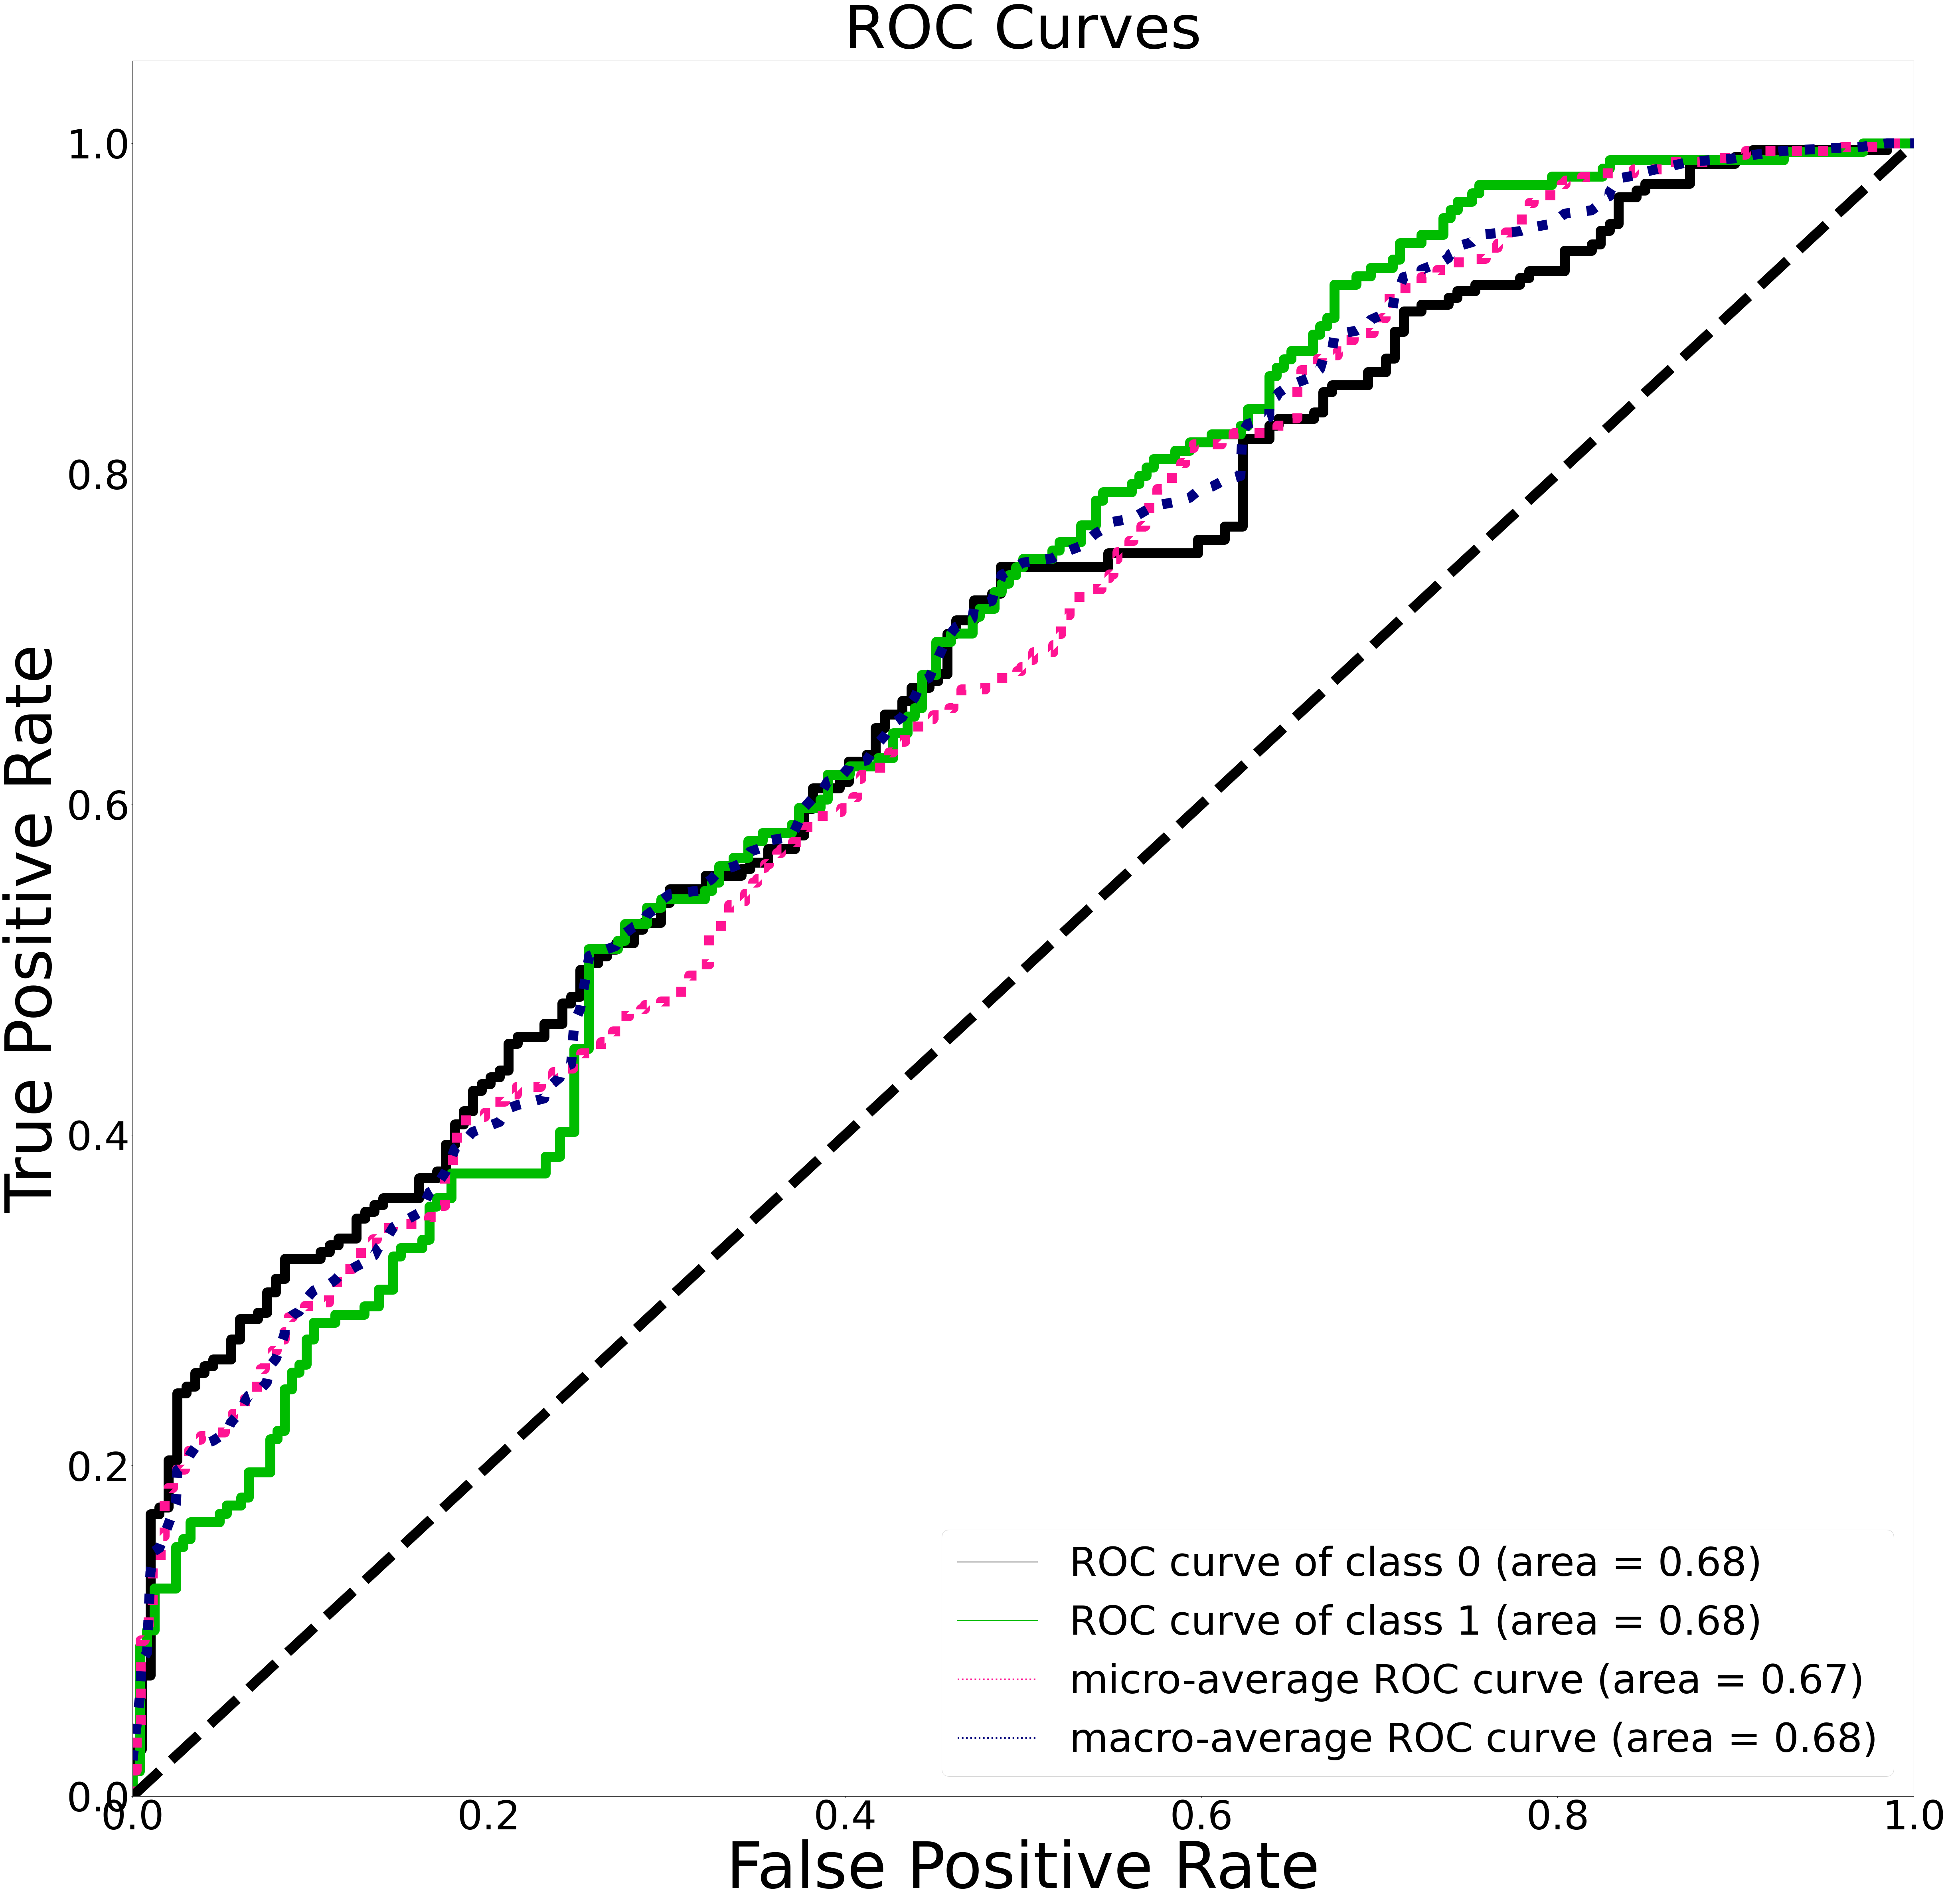

Average precision-recall score Random forest: 0.53


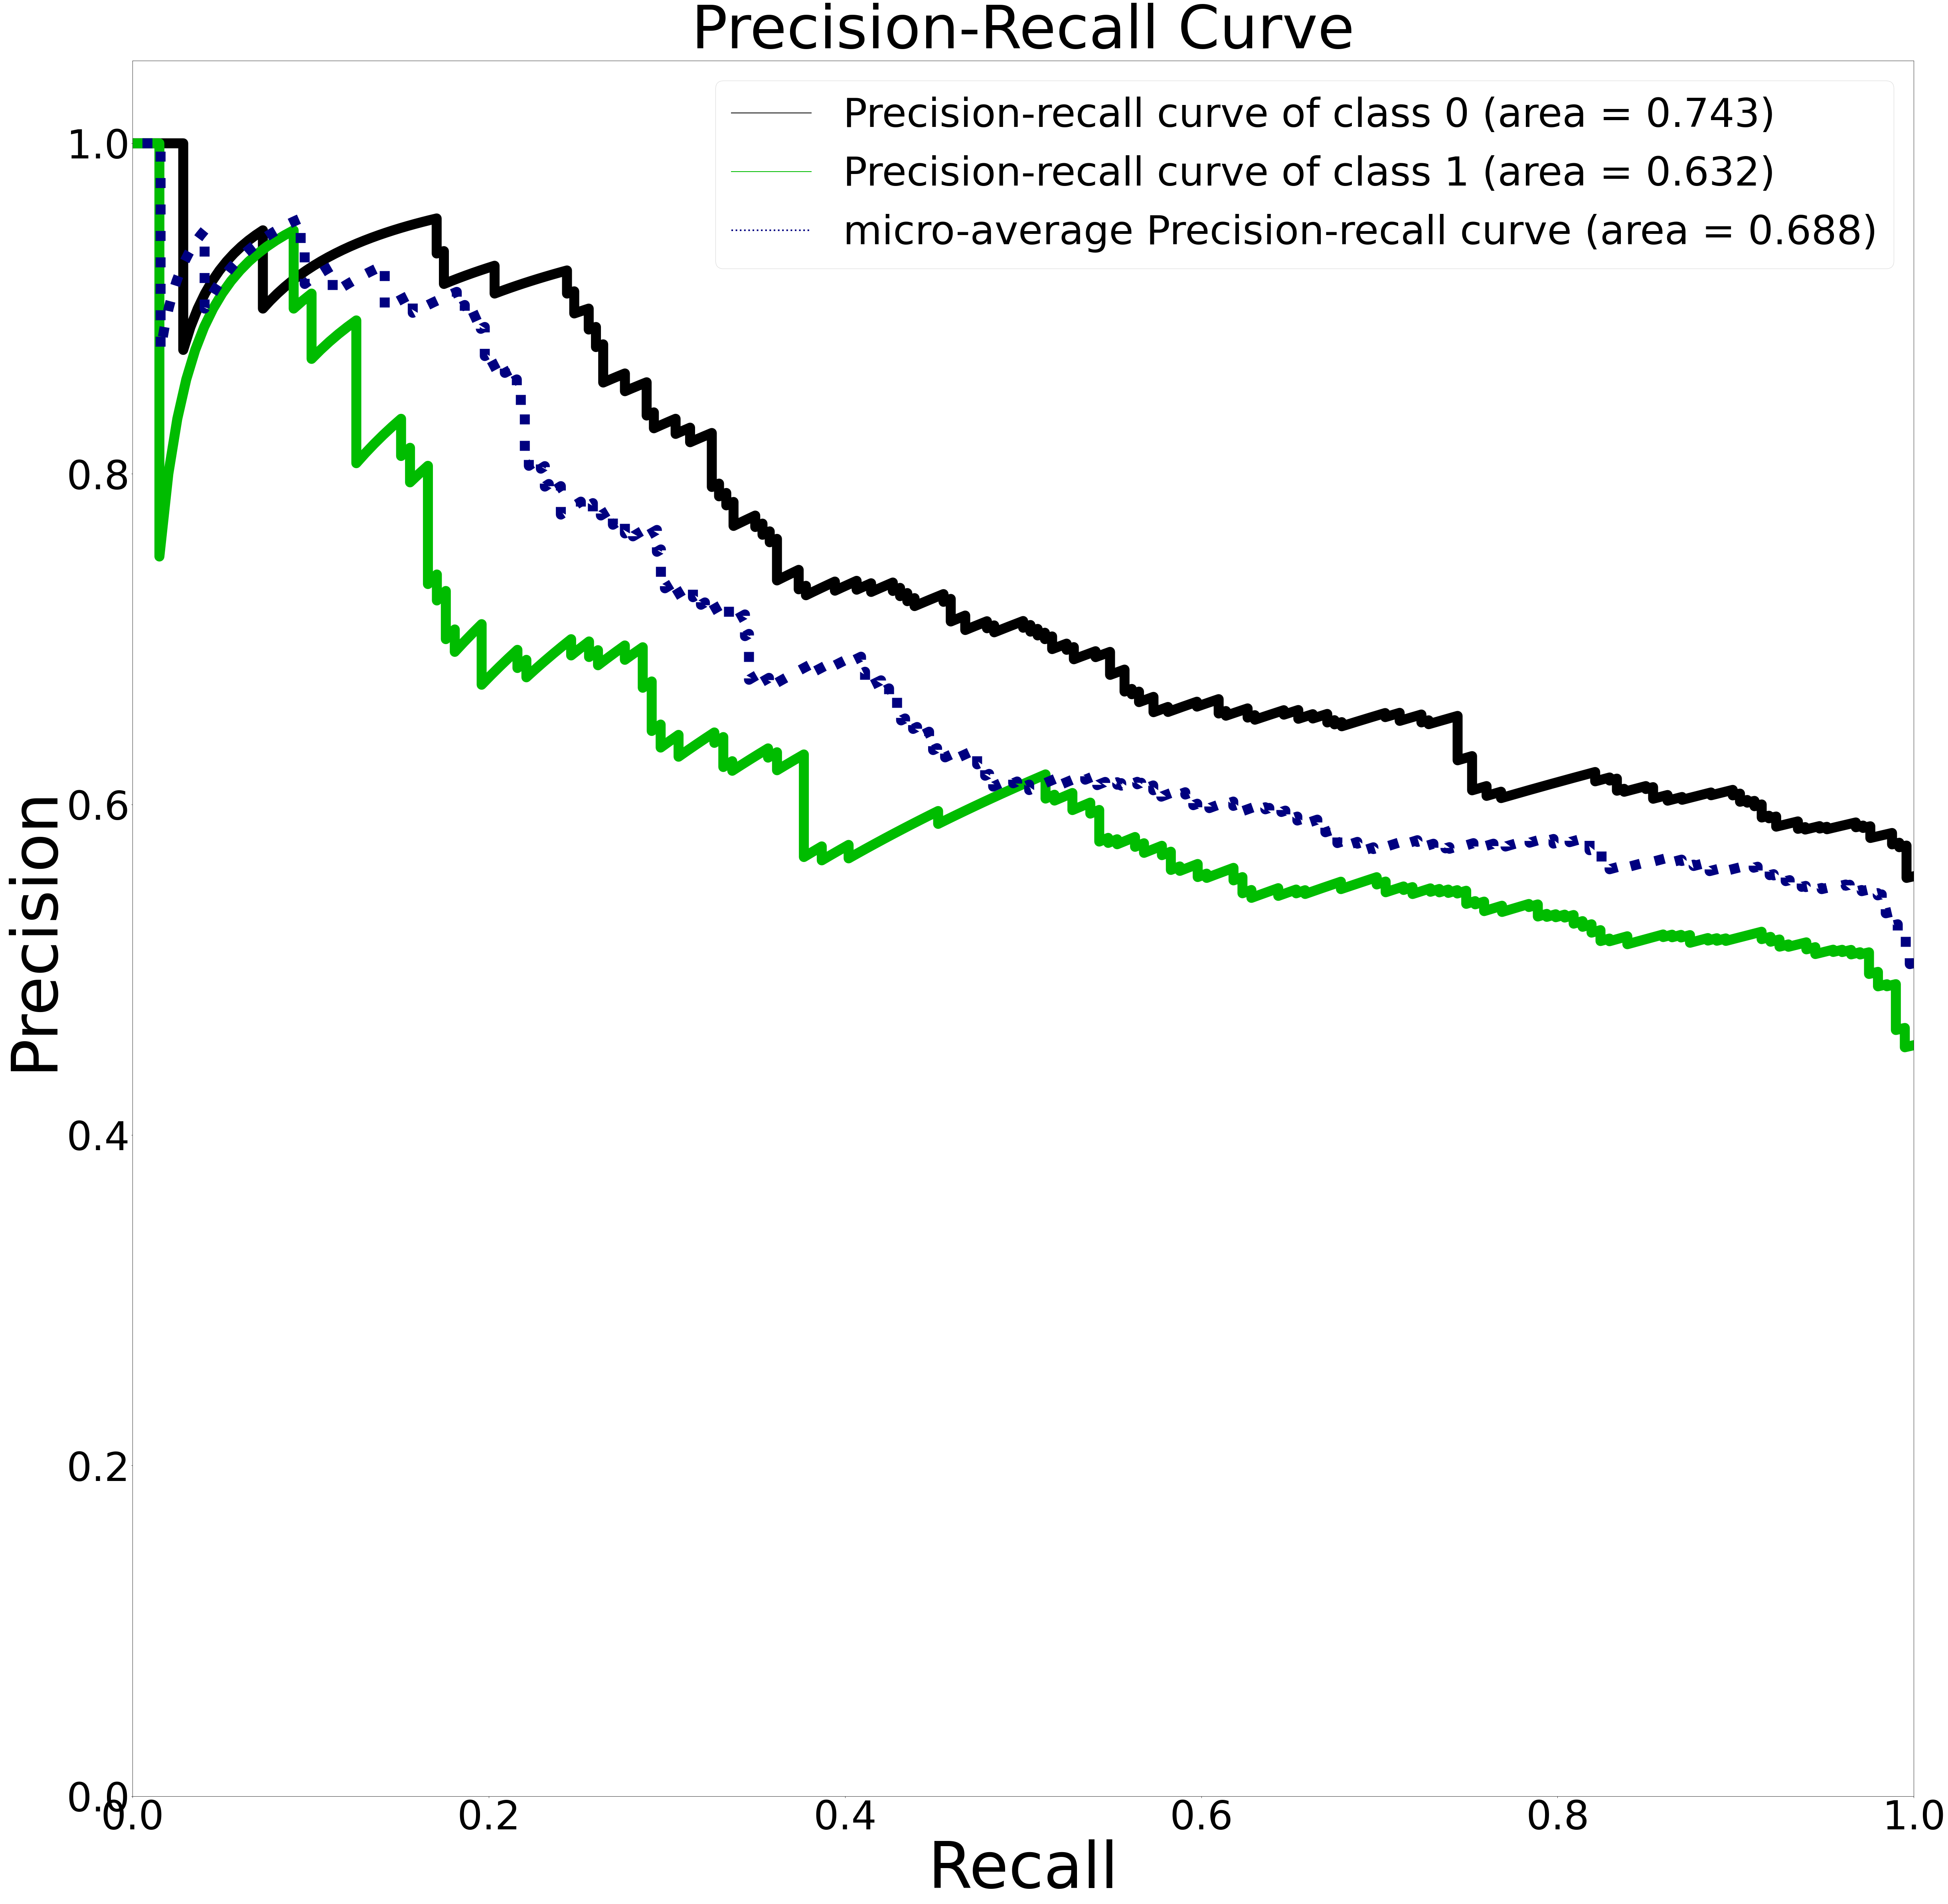

In [38]:
#Evaluation HyperParamter Tuned Random Forest
plot_graphs(best_random,x_test_raw,y_test_raw,y_basal_RandomForest)

In [39]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=5,
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=2000)